**Author : Nilanjan Dey**<br>
**Student ID : 210700851**

In [2]:
#import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
import os
#from PIL import Image
#import pathlib
#import csv 
import sklearn
from sklearn import preprocessing
from sklearn import linear_model
import librosa.display
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
#from sklearn.preprocessing import keras
from keras import layers
#from keras import layers
#import keras
from keras.models import Sequential 
#from keras.models import warnings
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


In [3]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa

drive.mount('/content/drive')

Mounted at /content/drive



#**Using Sounds dataset, building a machine learning pipeline that takes as an input an audio segment and predicts the location of audio recorded**

**Also Converted Speech to Text for one of the data to try something new**

The next step is to download the file 'MLEndLS_Sample.zip' into the folder 'MyDrive/Data/MLEndLS'. Note that this might take a while!

Run the following cell to check that the MLEndLS folder contains the file 'MLEndLS_Sample.zip':

In [4]:
path = '/content/drive/MyDrive/Data/MLEndLS'
os.listdir(path)

['MLEndLS_1 2.zip',
 'MLEndLS_2.zip',
 'MLEndLS_3.zip',
 'MLEndLS_data.zip',
 'MLEndLS_Sample.zip',
 'MLEndLS 2.csv']

# Understanding our dataset sample

Let's unzip the sample data:

In [5]:
directory_to_extract_to = '/content/drive/MyDrive/Data/MLEndLS/newfolder/'
zip_path = '/content/drive/MyDrive/Data/MLEndLS/MLEndLS_data.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)



And now check how many audio files we have:

In [6]:
sample_path = '/content/drive/MyDrive/Data/MLEndLS/newfolder/MLEndLS_1/*.wav'
files = glob.glob(sample_path)
len(files)

2494

In [7]:
for _ in range(3):
  n = np.random.randint(58)
  display(ipd.Audio(files[n]))



The MLEndLS Dataset contains 5 attributes:
- Audio
- Area
- Spot
- Whether indoor or outdoor
- Participant


In [8]:
MLENDLS_df = pd.read_csv('/content/drive/MyDrive/Data/MLEndLS/MLEndLS 2.csv').set_index('file_id') 
MLENDLS_df

area       spot   in_out Participant
file_id                                             
0001.wav     british     street  outdoor        S151
0002.wav  kensington   dinosaur   indoor        S127
0003.wav      campus     square  outdoor         S18
0004.wav  kensington     hintze   indoor        S179
0005.wav      campus     square  outdoor        S176
...              ...        ...      ...         ...
2496.wav     westend  trafalgar  outdoor        S151
2497.wav      campus     square  outdoor          S6
2498.wav     westend   national   indoor         S96
2499.wav     british     room12   indoor         S73
2500.wav     british     room12   indoor         S58

[2500 rows x 4 columns]

The audio attribute is a complex one and cannot be directly inserted in a DataFrame structure. Instead, we have the name of the corresponding audio files, e.g. '3086.wav', which in our case are stored in the '/content/drive/MyDrive/Data/MLEndLS/sample/MLEndLS_Sample/' folder. 

The next cell prints the contents of the folder that stores our sample audio files. You can see that the names of the WAV files correspond to one of the `file_id` entries in the `MLEndLS_df` DataFrame.

#Machine Learning Product Pipeline


1.   Download/Upload Dataset
2.   upload the metadata
3.   Feature Extraction(Amp, Waveleangth, MFCC, Zero Crossing)
4.   Analysing and Preprossesing Features using FFT
5.   Split the data for training and test data
6.   Prepare training data
7.   Build Model
8.   Train model
9.   Interferance


**Input(x): Audio File and Output(y) will be trageted label area which predicts the location of the sound**





In [9]:
for file in files:
  print(file.split('/')[-1])

2217.wav
0400.wav
0366.wav
1078.wav
0372.wav
0414.wav
1722.wav
1044.wav
1050.wav
1736.wav
0428.wav
1905.wav
1911.wav
1939.wav
1087.wav
0399.wav
1093.wav
0164.wav
0602.wav
2015.wav
2001.wav
0616.wav
1508.wav
0170.wav
1246.wav
0158.wav
2029.wav
1520.wav
1534.wav
1252.wav
0819.wav
1285.wav
0825.wav
0831.wav
1291.wav
0010.wav
1468.wav
0776.wav
2161.wav
2175.wav
0762.wav
0004.wav
1332.wav
0992.wav
1454.wav
0986.wav
1440.wav
2149.wav
0038.wav
1326.wav
0979.wav
0789.wav
0951.wav
1497.wav
0945.wav
1483.wav
2363.wav
0574.wav
0212.wav
2405.wav
2411.wav
1118.wav
0206.wav
0560.wav
2377.wav
0548.wav
1656.wav
2439.wav
1130.wav
1124.wav
1642.wav
1871.wav
1865.wav
1695.wav
1681.wav
1859.wav
2388.wav
2389.wav
1858.wav
1680.wav
1694.wav
1864.wav
1870.wav
1125.wav
1643.wav
1657.wav
0549.wav
1131.wav
2438.wav
0207.wav
1119.wav
2410.wav
2376.wav
0561.wav
0575.wav
2362.wav
2404.wav
0213.wav
1482.wav
0944.wav
1496.wav
0950.wav
0788.wav
0978.wav
2148.wav
1441.wav
0987.wav
1327.wav
0039.wav
1333.wav
1455.wav
0

# Feature extraction : Picth, mfcc, zero crossing, amp, freq, ftt

Audio files are complex data types. Specifically they are **discrete signals** or **time series**, consisting of values on a 1D temporal grid. These values are known as *samples* themselves, which might be a bit confusing, as we have used this term to refer to the *items* in our dataset. The **sampling frequency** is the rate at which samples in an audio file are produced. For instance a sampling frequency of 5HZ indicates that 5 produce 5 samples per second, or 1 sample every 0.2 s.

Let's plot one of our audio signals:

In [10]:
pip install SpeechRecognition


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 32.8 MB 1.3 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [11]:
import speech_recognition as sr


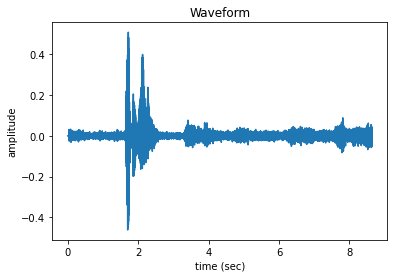

<Figure size 1440x360 with 0 Axes>

result2:
{   'alternative': [   {   'confidence': 0.81129283,
                           'transcript': 'this is London'},
                       {'transcript': 'thisislondon'}],
    'final': True}
this is London


In [12]:
for n in range(10):
 fs = 22050 # Sampling frequency
 x, fs = librosa.load(files[n],sr=fs)
 t = np.arange(len(x))/fs
plt.plot(t,x)
plt.xlabel('time (sec)')
plt.ylabel('amplitude')
plt.title('Waveform')
plt.savefig('waveform.png', dpi=100)
plt.figure(figsize=(20, 5))
plt.show()
display(ipd.Audio(files[n]))
r = sr.Recognizer()
with sr.AudioFile(files[n]) as source:
    # listen for the data (load audio to memory)
    audio_data = r.record(source)
    # recognize (convert from speech to text)
    text = r.recognize_google(audio_data)
    print(text)

Can you tell whether you are listening to an indoors or outdoors location? Does it agree with the values shown in the ``` MLENDLS_df ``` dataframe? Let's check it:
 

In [13]:
# perform Fourier transform
fft = np.fft.fft(x)
# calculate abs values on complex numbers to get magnitude
spectrum = np.abs(fft)
# create frequency variable
f = np.linspace(0, fs, len(spectrum))
# take half of the spectrum and frequency
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]
# plot spectrum
plt.plot(left_f, left_spectrum, alpha=0.4)
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('Power spectrum')
plt.savefig('FFT.png')
plt.show()

#Transformation Stage
Used different feature extractions to understand and analys the data
- MFCC(The great advantage of MFCCs  is that they approximate the human auditory system and attempt to model the way we perceive frequency.MFCC vector specify a number of different coefficients usually in our data to use between 13 and 39 coefficients. Also I tried for speech to text for one audio data for which mfcc was required.)
- Zero-Crossing Rate(Calculating the number of zero-crossings in a signal segment is a straightforward method for determining its smoothness. A voice signal oscillates slowly, crossing zero 100 times per second, whereas an unvoiced fricative may cross zero 3000 times per second.It typically has higher values for sounds with a lot of percussion, like traffic noise. Presently let us picture it and perceive how we ascertain zero intersection rate.)
- Spectrogram STFT(A spectrogram is a visual way to show the signal's "loudness," or strength, over time at different frequencies in a particular waveform. USed see not only whether there is more or less energy at. USed short term Fourier transform (stft()) to transform data. By converting signals, STFT makes it possible to determine the amplitude of a given frequency at a given time. The amplitude of various frequencies that are playing simultaneously in an audio signal can be determined with the help of STFT.)

STFT hop length duration is:0.023219954648526078s
STFT window duration is: 0.09287981859410431s


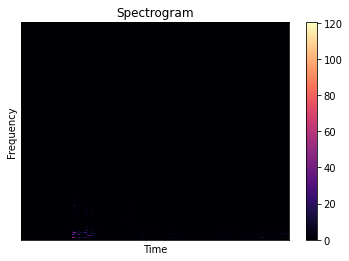

In [14]:
#STFT - spectrogram
hop_len = 512 # in num. of samples
num_fft = 2048 # window in num. of samples
# calculate duration hop length and window in seconds
hop_length_duration = float(hop_len)/fs
n_fft_duration = float(num_fft)/fs
print('STFT hop length duration is:{}s'.format(hop_length_duration))
print('STFT window duration is: {}s'.format(n_fft_duration))
# perform stft
stft = librosa.stft(x, num_fft=num_fft, hop_length=hop_len)
# calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft)
# display spectrogram
librosa.display.specshow(spectrogram, sr=fs, hop_length=hop_len)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar()
plt.title('Spectrogram')
plt.savefig('spectogram.png')
plt.show()

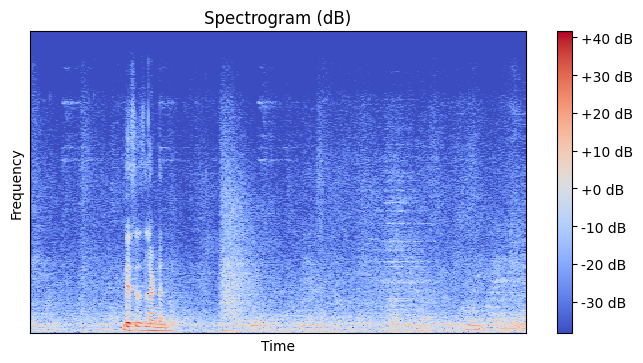

In [15]:
# apply logarithm to cast amplitude to Decibels
log_spectrogram = librosa.amplitude_to_db(spectrogram)
plt.figure(figsize=(8,4), dpi=100)
librosa.display.specshow(log_spectrogram, sr=fs,
hop_length=hop_length)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram (dB)')
plt.savefig('spectogram_log.png')
plt.show()

#Dataset and data visualisation
Everything we need to know about sound. When an object vibrates, it causes an oscillation of air molecules, which in turn causes an alternation of air pressure, resulting in a wave of high pressure alternated with low pressure.a few important terms in audio processing.
Amplitude is the perceived loudness, frequency is the perceived pitch, and sample rate is the number of times a sample is taken from a sound file.


It's FFT special power spectrum here was a snapshot of all the elements which concur to form this sound. Basically, what this spectrum is telling us is that these different frequencies have different powers but throughout all of them all of the sound here so it's a snapshot it's a static which could be seen as a problem because obviously audio data alike is a time series right so things change in time and so we want to know how things change in time and it seems that with the Fourier transform we can.

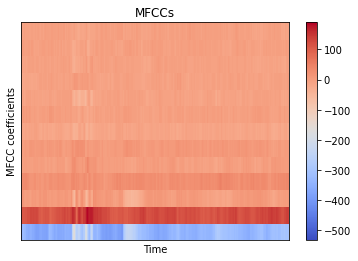

In [16]:
# MFCCs
# extract 13 MFCCs
mfccs = librosa.feature.mfcc(x, fs, n_fft=n_fft,
hop_length=hop_length, n_mfcc=13)
# display MFCCs
librosa.display.specshow(mfccs, sr=fs,
hop_length=hop_length)
plt.xlabel('Time')
plt.ylabel('MFCC coefficients')
plt.colorbar()
plt.title('MFCCs')
plt.savefig('mfcc.png')
plt.show()

In [17]:
pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
from pydub import AudioSegment
from pydub.silence import split_on_silence

In [269]:
MLENDLS_df.loc[files[n].split('/')[-1]]

area           british
spot            room12
in_out          indoor
Participant       S104
Name: 1736.wav, dtype: object

Note that we are using the name of the audio file as the index in the Pandas DataFrame. By changing the value of `n` in the previous cell, you can listen to other examples. If you are doing this during one of our lab sessions, please make sure that your mic is muted!

Exactly, how complex is an audio signal? Let's start by looking at the number of samples (i.e. time series samples) in one of our audio files:

This audio signal has 163170 samples


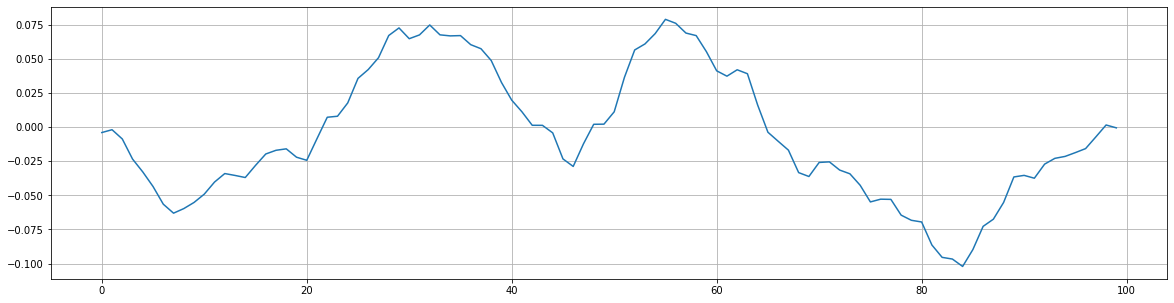

In [19]:
n=0
x, fs = librosa.load(files[n],sr=fs)
print('This audio signal has', len(x), 'samples')
n0 = 9000
n1 = 9100
plt.figure(figsize=(20, 5))
plt.plot(x[n0:n1])
plt.grid()


In [20]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
zero_crossings.shape


(100,)

In [21]:
print(sum(zero_crossings))
zcrs = librosa.feature.zero_crossing_rate(x)
print(zcrs.shape)


6
(1, 319)


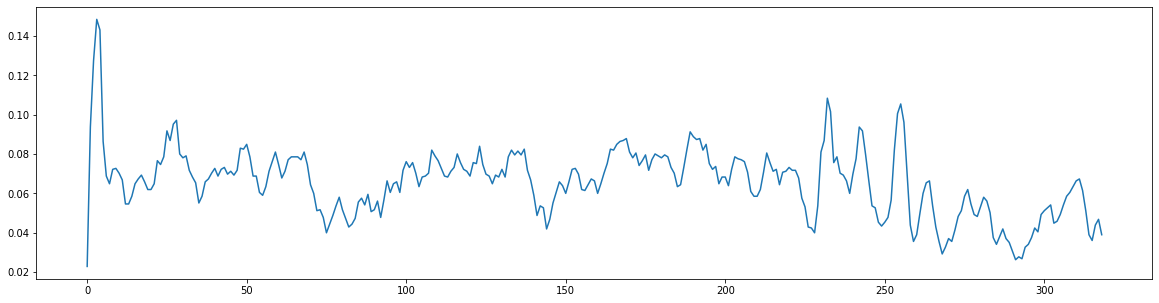

In [22]:
plt.figure(figsize=(20, 5))
plt.plot(zcrs[0])

If we are using a raw audio signal as the input of a machine learning model, we will be operating in a predictor space consisting of hundreds of thousands of dimensions. Compare this figure with the number of items (i.e. recordings) that we have. Do we have enough samples to train a model that takes one of these audio signals as an input?

One approach to deal with this huge dimensionality is to extract a few features from our signals and use these features as predictors instead. In this notebook we will use four audio features, namely:


1.   Power.
2.   Pitch - mean.
3.   Pitch - standard deviation.
4.   Fraction of voiced region.

In the next cell, we define a new function that gets the pitch of an audio signal (do not worry if you do not know what it is, but feel free to read about it!).

In [23]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=fs)[0]
spectral_centroids.shape

(319,)

In [276]:
pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


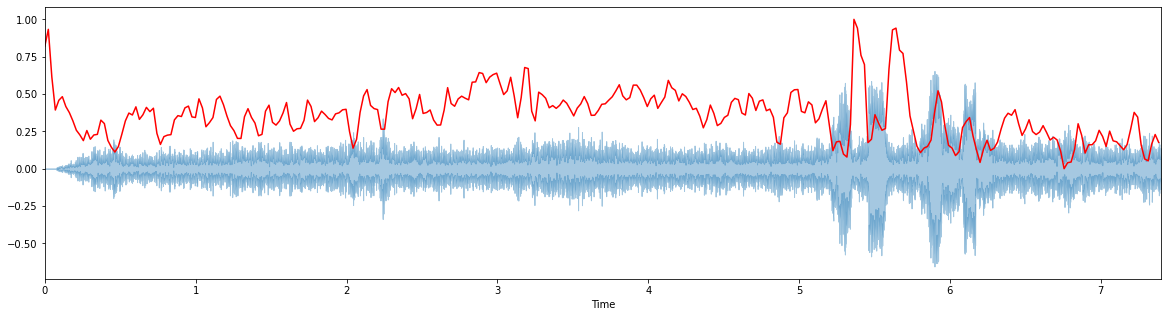

In [24]:

# Computing the time variable for visualization
plt.figure(figsize=(20,5))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=fs, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

preprocessing spectral centroid feature with minmax scale.
After scaling we can see that the red which is feature data but normalised with frequency which also represents scaling of noise in the bacground with frequency time.

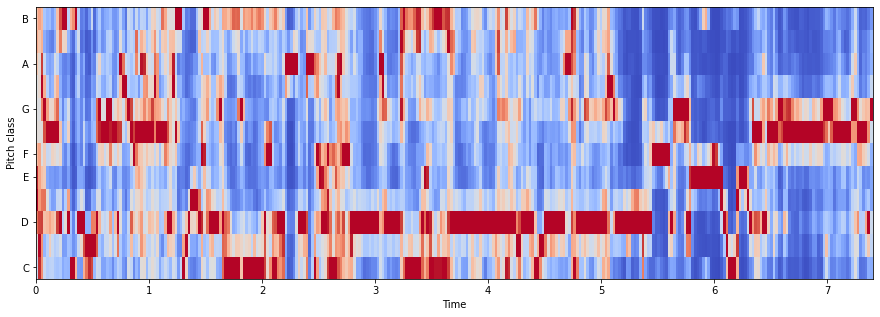

In [25]:
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=fs, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

preprocessing spectral centroid feature with minmax scale.
After scaling we can see that the red which is feature data but normalised with frequency which also represents scaling of noise in the bacground with frequency time.

In [26]:
def getPitch(x,fs,winLen=0.02):
  #winLen = 0.02 
  p = winLen*fs
  frame_length = int(2**int(p-1).bit_length())
  hop_length = frame_length//2
  f0, voiced_flag, voiced_probs = librosa.pyin(y=x, fmin=80, fmax=450, sr=fs,
                                                 frame_length=frame_length,hop_length=hop_length)
  return f0,voiced_flag

Let's consider the problem of determining whether the filming spot is indoors or outdoors. Then next cell defines a function that takes a collection of audio files together with a CSV file and creates a NumPy array containing the 4 audio features used as predictors (`X`) and a binary label (`y`) that indicates whether the recording is indoors (`y=1`) or outdoors (`y=0`).

(20, 319)


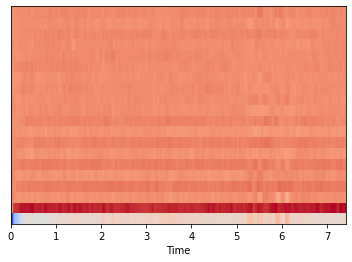

In [27]:
mfccs = librosa.feature.mfcc(x, sr=fs)
print(mfccs.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=fs, x_axis='time')

In [28]:
MLENDLS_df['area'] = MLENDLS_df['area'].astype("category")
MLENDLS_df['area_encoded'] = MLENDLS_df['area'].cat.codes
MLENDLS_df['area'].unique()
MLENDLS_df.head()

area      spot   in_out Participant  area_encoded
file_id                                                          
0001.wav     british    street  outdoor        S151             1
0002.wav  kensington  dinosaur   indoor        S127             3
0003.wav      campus    square  outdoor         S18             2
0004.wav  kensington    hintze   indoor        S179             3
0005.wav      campus    square  outdoor        S176             2

In [29]:
def getXy(files,labels_file, scale_audio=False, onlySingleDigit=False):
  X,y =[],[]
  for file in tqdm(files):
    fileID = file.split('/')[-1]
    file_name = file.split('/')[-1]
    yi = labels_file.loc[fileID]['area_encoded']

    fs = None # if None, fs would be 22050
    x, fs = librosa.load(file,sr=fs)
    if scale_audio: x = x/np.max(np.abs(x))
    f0, voiced_flag = getPitch(x,fs,winLen=0.02)

    power = np.sum(x**2)/len(x)
    pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0))<1 else 0
    pitch_std  = np.nanstd(f0) if np.mean(np.isnan(f0))<1 else 0
    voiced_fr = np.mean(voiced_flag)

    amp = librosa.amplitude_to_db(x)
    amp_mean = np.nanmean(amp) if np.mean(np.isnan(amp))<1 else 0
    amp_std  = np.nanstd(amp) if np.mean(np.isnan(amp))<1 else 0

    zcr = librosa.zero_crossings(x)
    zcr_mean = np.nanmean(zcr) if np.mean(np.isnan(zcr))<1 else 0
    zcr_std  = np.nanstd(zcr) if np.mean(np.isnan(zcr))<1 else 0

    sro = librosa.feature.spectral_rolloff(x, sr=fs)
    sro_mean = np.nanmean(sro) if np.mean(np.isnan(sro))<1 else 0
    sro_std  = np.nanstd(sro) if np.mean(np.isnan(sro))<1 else 0

    mfccs = librosa.feature.mfcc(x, sr=fs)
    mfccs_mean = np.nanmean(mfccs) if np.mean(np.isnan(mfccs))<1 else 0
    mfccs_std  = np.nanstd(mfccs) if np.mean(np.isnan(mfccs))<1 else 0

    xi = [power,pitch_mean,pitch_std,voiced_fr, zcr_mean, amp_mean, amp_std, sro_mean, sro_std, mfccs_mean, mfccs_std]
    X.append(xi)
    y.append(yi)
  return np.array(X),np.array(y)

Let's apply `getXy` to the subsample and obtain the NumPy predictor array (`X`) and a binary label (`y`). This could take a while, as we are processing each of the 100 audio signals. 

In [30]:
X,y = getXy(files, labels_file=MLENDLS_df, scale_audio=True, onlySingleDigit=True)

100%|██████████| 2494/2494 [41:20<00:00,  1.01it/s]


The next cell shows the shape of `X` and `y` and prints the labels vector `y`:

In [36]:
print('The shape of X is', X.shape) 
print('The shape of y is', y.shape)
print('The labels vector is', y)


The shape of X is (2494, 11)
The shape of y is (2494,)
The labels vector is [5 2 3 ... 1 1 4]


As you can see, we have 100 items consisting of 4 features (stored in `X`) and one binary label (stored in `y`). Is our dataset balanced? Let's have a look:

# Modeling: XGBoost model

Boosting is a sequential technique which works on the principle of an ensemble. It combines a set of weak learners and delivers improved prediction accuracy. At any instant t, the model outcomes are weighed based on the outcomes of previous instant t-1. The outcomes predicted correctly are given a lower weight and the ones miss-classified are weighted higher. Note that a weak learner is one which is slightly better than random guessing. For example, a decision tree whose predictions are slightly better than 50%. Let's understand boosting in general with a simple illustration.

In [37]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.25)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1870, 11), (624, 11), (1870,), (624,))

In [240]:
## Trianing my model

In [70]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train,y_train)
prediction_val = xgb_classifier.predict(X_val)
prediction_train= xgb_classifier.predict(X_train)

print('prediction_val',accuracy_score(y_val,prediction_val))
print('prediction_train',accuracy_score(y_train,prediction_train))

prediction_val 0.36538461538461536
prediction_train 0.6320855614973262


#Methodology
Building a weak model, drawing conclusions about the relative relevance of different features, and then using those insights to create a new, stronger model in an effort to reduce the misclassification error of the prior model, is the fundamental notion behind boosting algorithms. Let's go on to XGBoost now. To start, you need to be familiar with XGBoost's tree ensemble base learners. A collection of classification and regression trees make up the tree ensemble model (CART). Trees are produced one after the other, and future iterations make an effort to lower the misclassification rate.

After normalisation, the Base Model came in at 25, which clarifies the data. The Base Model was coming in at 22%, which was quite low. It climbed to 62 after using XGBoost, although with overfitting.



**The accuracy is coming as 63 % for training dataset and 36.5 % for test dataset**

In [46]:
from sklearn import svm
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.25)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1870, 11), (624, 11), (1870,), (624,))

Can you identify the number of items in the training and validation sets?

Let's now fit an SVM model and print both the training accuracty and validation accuracy.


In [47]:
model  = svm.SVC(C=1)
model.fit(X_train,y_train)

yt_p = model.predict(X_train)
yv_p = model.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))
print('The support vectors are', model.support_vectors_.shape)

Training Accuracy 0.3502673796791444
Validation  Accuracy 0.3605769230769231
The support vectors are (1828, 11)


Compare the training and validation accuracies. Is our model overfitting, underfitting, performing well? What do you think the accuracy of a random classifier would be?

Let's normalise the predictors, to see if the performance improves.


#Result

we can see that the prection accuracy of training and test data set is almost same which are 62 % and 36 % respectively which also shows that training dataset is overfitted.

the base model was coming as 22 % using basic features and after preprocessing features aand using regulization regresssion model increased to 25.

using svm model it over fits alot with huge number which i have represented below therefore i rejected SVM model and only accepted XGBoost model with 62 and 36 accuracy.
#Accepted XGBoost Model as it is showing better result than other models but still overfits

In [48]:
mean = X_train.mean(0)
sd =  X_train.std(0)

X_train = (X_train-mean)/sd
X_val  = (X_val-mean)/sd

model  = svm.SVC(C=1,gamma=2)
model.fit(X_train,y_train)

yt_p = model.predict(X_train)
yv_p = model.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))
print('The support vectors are', model.support_vectors_.shape)

Training Accuracy 0.9545454545454546
Validation  Accuracy 0.34455128205128205
The support vectors are (1870, 11)


#Conclusion
I have seen a straightforward Python pipeline for working with sound data in this project.Now I know how to convert audio file data to a NumPy array. Using differnt feature extraction analying the features of the audio predicted locations with 62% accuracy also overfits which explains that using science methodoly is not only solution correct data and informative data related to the problem is also important.